# WeatherPy

In [65]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [66]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [67]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=Metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except KeyError:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | usogorsk
Processing Record 2 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 3 of Set 1 | portland
Processing Record 4 of Set 1 | novohrad-volynskyi
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | la passe
Processing Record 8 of Set 1 | takamaka
City not found. Skipping...
Processing Record 9 of Set 1 | nemuro
Processing Record 10 of Set 1 | magadan
Processing Record 11 of Set 1 | mahina
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | invercargill
Processing Record 14 of Set 1 | ribeira grande
Processing Record 15 of Set 1 | west island
Processing Record 16 of Set 1 | gizo
Processing Record 17 of Set 1 | aasiaat
Processing Record 18 of Set 1 | lata
Processing Record 19 of Set 1 | waitangi
Processing Record 20 of Set 1 | kargasok
Processing Record 21 of Set 1 | las tablas
Processing 

In [68]:
city_data

[{'City': 'usogorsk',
  'Lat': 63.4106,
  'Lng': 48.6872,
  'Max Temp': 2.67,
  'Humidity': 100,
  'Cloudiness': 100,
  'Wind Speed': 3.75,
  'Country': 'RU',
  'Date': 1682351342},
 {'City': 'portland',
  'Lat': 45.5234,
  'Lng': -122.6762,
  'Max Temp': 10.6,
  'Humidity': 88,
  'Cloudiness': 75,
  'Wind Speed': 3.13,
  'Country': 'US',
  'Date': 1682351215},
 {'City': 'novohrad-volynskyi',
  'Lat': 50.5941,
  'Lng': 27.6165,
  'Max Temp': 14.27,
  'Humidity': 58,
  'Cloudiness': 67,
  'Wind Speed': 4.17,
  'Country': 'UA',
  'Date': 1682351343},
 {'City': 'adamstown',
  'Lat': -25.066,
  'Lng': -130.1015,
  'Max Temp': 24.73,
  'Humidity': 88,
  'Cloudiness': 98,
  'Wind Speed': 5.71,
  'Country': 'PN',
  'Date': 1682351343},
 {'City': 'ushuaia',
  'Lat': -54.8,
  'Lng': -68.3,
  'Max Temp': 6.81,
  'Humidity': 76,
  'Cloudiness': 75,
  'Wind Speed': 1.54,
  'Country': 'AR',
  'Date': 1682351225},
 {'City': 'la passe',
  'Lat': 45.5549,
  'Lng': -0.8967,
  'Max Temp': 16.13,
  'Humi

In [69]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [70]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,usogorsk,63.4106,48.6872,2.67,100,100,3.75,RU,1682351342
1,portland,45.5234,-122.6762,10.60,88,75,3.13,US,1682351215
2,novohrad-volynskyi,50.5941,27.6165,14.27,58,67,4.17,UA,1682351343
3,adamstown,-25.0660,-130.1015,24.73,88,98,5.71,PN,1682351343
4,ushuaia,-54.8000,-68.3000,6.81,76,75,1.54,AR,1682351225


In [71]:
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

### Create the Scatter Plots Requested

In [72]:
city_data_df = pd.read_csv("../output_data/cities.csv", index_col='City_ID')
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,usogorsk,63.4106,48.6872,2.67,100,100,3.75,RU,1682351342
1,portland,45.5234,-122.6762,10.60,88,75,3.13,US,1682351215
2,novohrad-volynskyi,50.5941,27.6165,14.27,58,67,4.17,UA,1682351343
3,adamstown,-25.0660,-130.1015,24.73,88,98,5.71,PN,1682351343
4,ushuaia,-54.8000,-68.3000,6.81,76,75,1.54,AR,1682351225


In [73]:
city_data_df.columns

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')

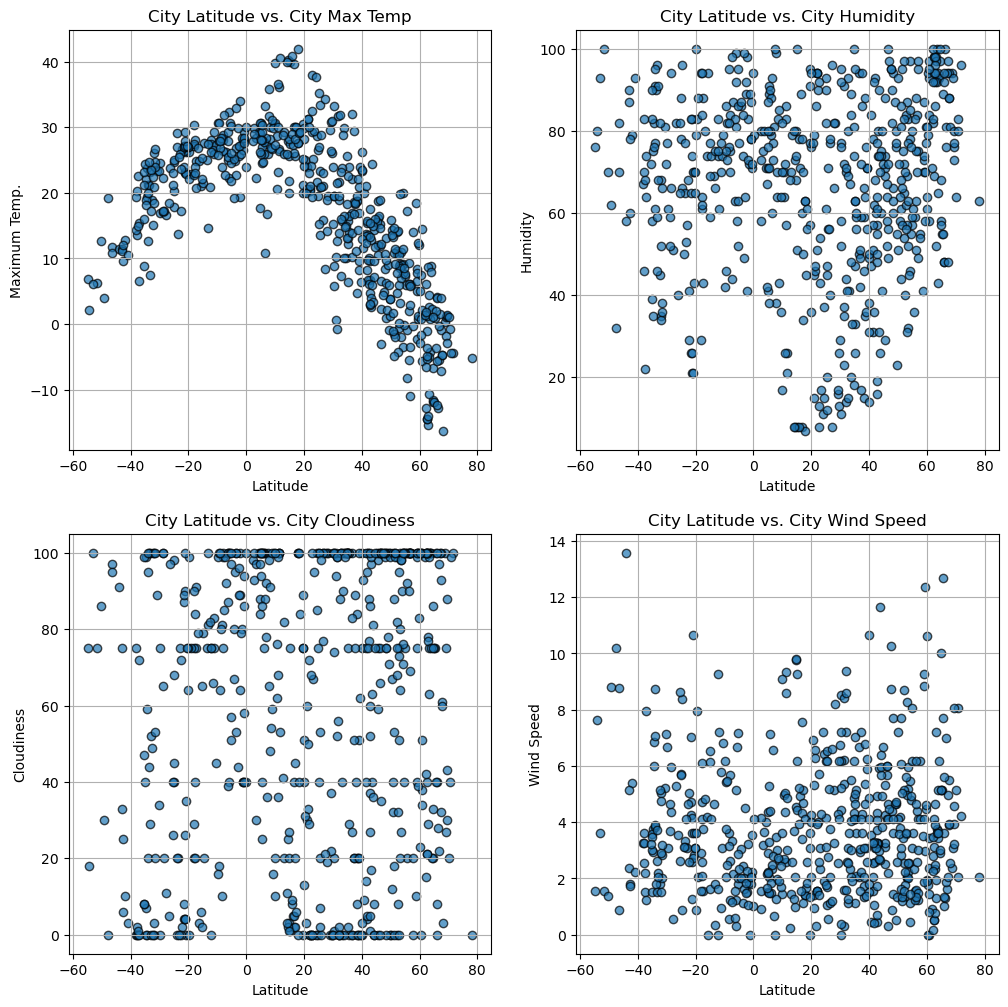

In [74]:
# Plotting Latitude vs. Max Temperature

fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(ncols=2,nrows=2, figsize=(12,12))
ax0.scatter(x=city_data_df['Lat'], y=city_data_df['Max Temp'], edgecolors='black', alpha=0.7)
ax0.set_xlabel('Latitude')
ax0.set_ylabel('Maximum Temp.')
ax0.set_title('City Latitude vs. City Max Temp')
ax0.grid()

ax1.scatter(x=city_data_df['Lat'], y=city_data_df['Humidity'], edgecolors='black', alpha=0.7)
ax1.set_xlabel('Latitude')
ax1.set_ylabel('Humidity')
ax1.set_title('City Latitude vs. City Humidity')
ax1.grid()

ax2.scatter(x=city_data_df['Lat'], y=city_data_df['Cloudiness'], edgecolors='black', alpha=0.7)
ax2.set_xlabel('Latitude')
ax2.set_ylabel('Cloudiness')
ax2.set_title('City Latitude vs. City Cloudiness')
ax2.grid()

ax3.scatter(x=city_data_df['Lat'], y=city_data_df['Wind Speed'], edgecolors='black', alpha=0.7)
ax3.set_xlabel('Latitude')
ax3.set_ylabel('Wind Speed')
ax3.set_title('City Latitude vs. City Wind Speed')
ax3.grid()


fig.savefig("../output_data/multiFigScatter.png")


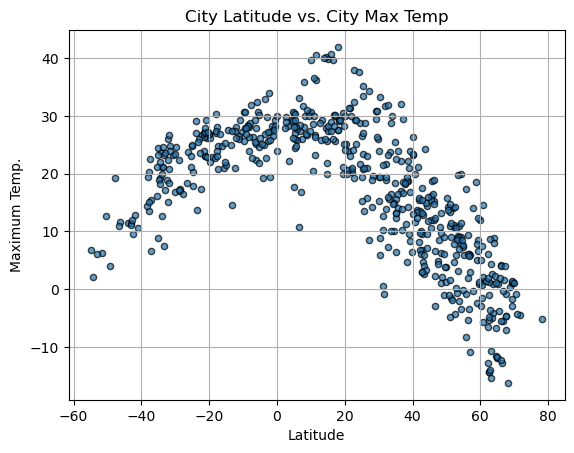

In [75]:
city_data_df.plot(kind='scatter', x='Lat', y='Max Temp', edgecolor='black', alpha=0.7)
plt.xlabel('Latitude')
plt.ylabel('Maximum Temp.')
plt.title('City Latitude vs. City Max Temp')
plt.grid()
plt.savefig("../output_data/Fig1.png")

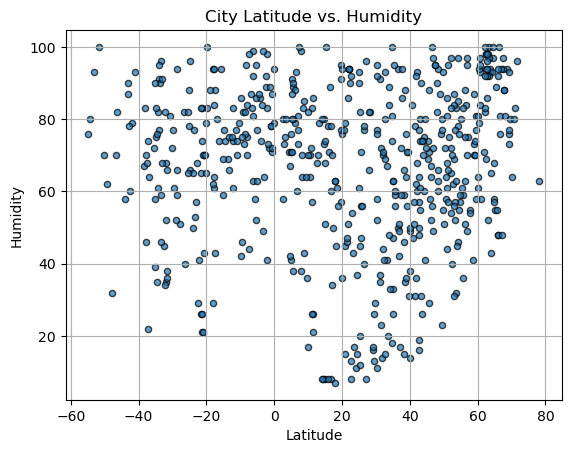

In [76]:
# Plotting Latitude vs. Humidity
city_data_df.plot(kind='scatter', x='Lat', y='Humidity', edgecolor='black', alpha=0.7)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Latitude vs. Humidity')
plt.grid()
plt.savefig("../output_data/Fig2.png")

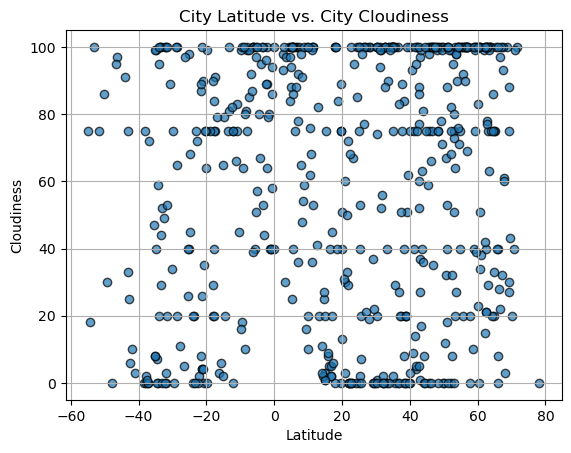

In [77]:
plt.scatter(x=city_data_df['Lat'], y=city_data_df['Cloudiness'], edgecolors='black', alpha=0.7)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs. City Cloudiness')
plt.grid()

plt.savefig("../output_data/Fig3.png")

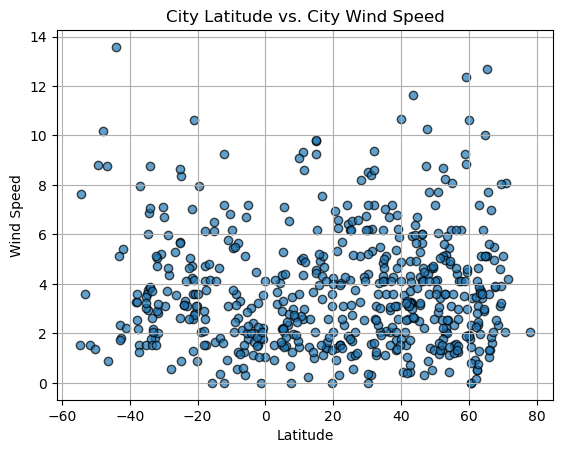

In [78]:
plt.scatter(x=city_data_df['Lat'], y=city_data_df['Wind Speed'], edgecolors='black', alpha=0.7)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Latitude vs. City Wind Speed')
plt.grid()
plt.savefig("../output_data/Fig4.png")

---
## Requirement 2: Compute Linear Regression for Each Relationship

In [79]:
## separating data into northern and southern hemispheres 
north_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]
print(north_hemi_df['Lat'].describe())

south_hemi_df = city_data_df.loc[city_data_df['Lat']<0]
print(south_hemi_df['Lat'].describe())


count    395.000000
mean      38.669787
std       19.149736
min        0.038900
25%       22.712950
50%       40.162900
75%       54.255000
max       78.218600
Name: Lat, dtype: float64
count    168.000000
mean     -21.639014
std       13.873554
min      -54.800000
25%      -33.012600
50%      -21.126650
75%       -9.052250
max       -0.130300
Name: Lat, dtype: float64


In [151]:
# define a function to create linear regression plots
def linRegPlot(x,y):
    #running linear regression
    (m, b, rvalue, pvalue, stderr) = linregress(x,y)
    y_pred = m*x+b
    lin_eq = f"y = {round(m, 2)}x + {round(b, 2)}"

    # plotting code
    plt.scatter(x,y, alpha = 0.7)
    plt.plot(x,y_pred, color='red')
    if rvalue < 0.0:
        plt.annotate(lin_eq, (x.min()+5, y.min()+10), fontsize=16, color='red')
    else:
        plt.annotate(lin_eq, (x.min(), y.min()+5), fontsize=16, color='red')
    plt.xlabel('Latitude')
    plt.ylabel(f"{y.name}")
    plt.title(f"City {x.name}. vs. City {y.name}")

    # printing r-value & p-value
    print(f"The r-value is: {rvalue}")
    print(f"The p-value is: {pvalue}")

### Max Temp vs. Latitude

Latitude vs Max Temp for Northern Hemisphere

The r-value is: -0.842791965212283


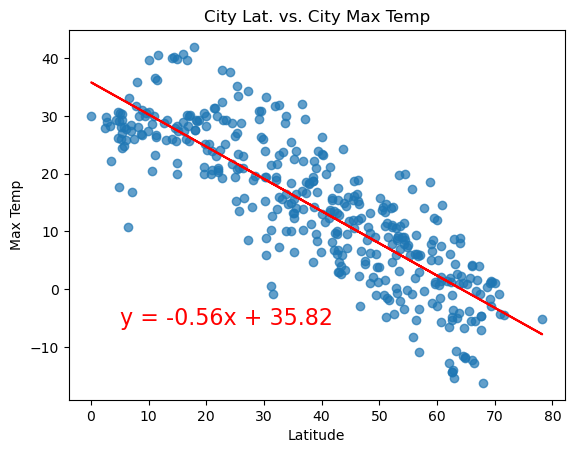

In [152]:
linRegPlot(north_hemi_df['Lat'], north_hemi_df['Max Temp'])

Latitude vs. Max Temp for Southern Hemisphere

The r-value is: 0.7619156281959294


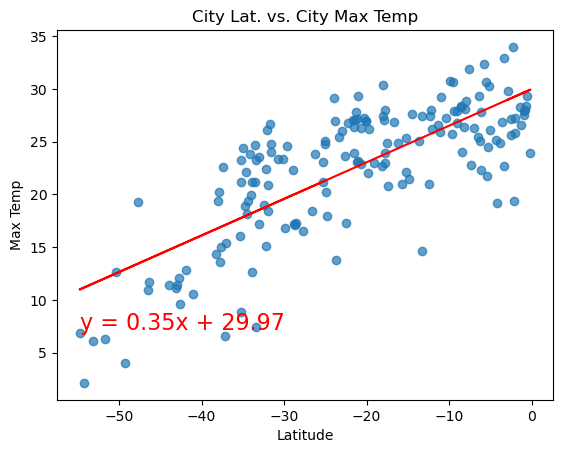

In [153]:
linRegPlot(south_hemi_df['Lat'], south_hemi_df['Max Temp'])

**Description of the relationship between latitude and max temp**
This linear regression is modeling the relationship between latitude and the max temp of a city. In the Northern hemisphere, latitude is inversely correlated with the maximum temperature. This means that as the latitude gets larger the maximum temperature gets lower. This makes sense, the further a city from the equator, the lower it's maximum temperature is likely to be. In the southern hemisphere, the relationship is reversed: latitude is positively correlated with maximum temperature. As inidicated by the r-squared value, the variance in maximum temp explained by latitude is high (approximately 80%).

### Humidity vs. Latitude

Humidity vs. Latitude (North)

The r-value is: 0.22357540603487205


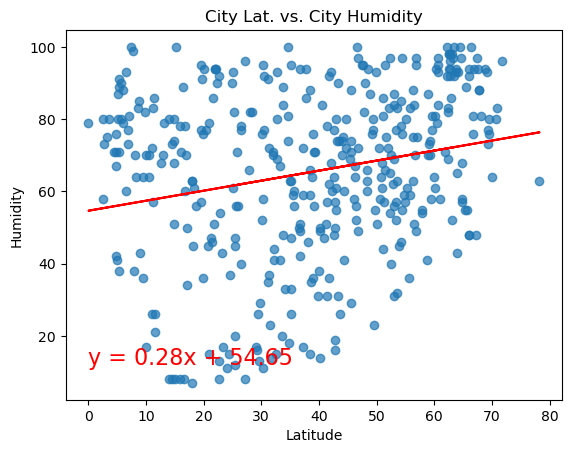

In [154]:
linRegPlot(north_hemi_df['Lat'], north_hemi_df['Humidity'])

Humidity vs. Latitude (South)

The r-value is: 0.14825699898646455


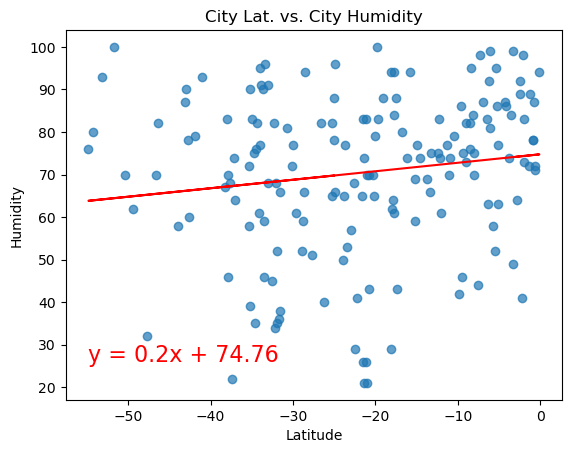

In [155]:
linRegPlot(south_hemi_df['Lat'], south_hemi_df['Humidity'])

**Description of relationship between Latitude and Humidity**
These linear regressions are modeling the relationship between a city's humidity and latitude. In both hemispheres, a small positive relationship between latitude and humidity is revealed. This means that in both hemispheres, as latitude grows, so does the humidity. It is important to qualify how small this relationship is. Respectively, latitude only explains 22% or 14% of the variance in humidity in the northern and southern hemispheres.

### Cloudiness vs. Latitude

Cloudiness vs. Latitude (North)

The r-value is: 0.07869025237606277


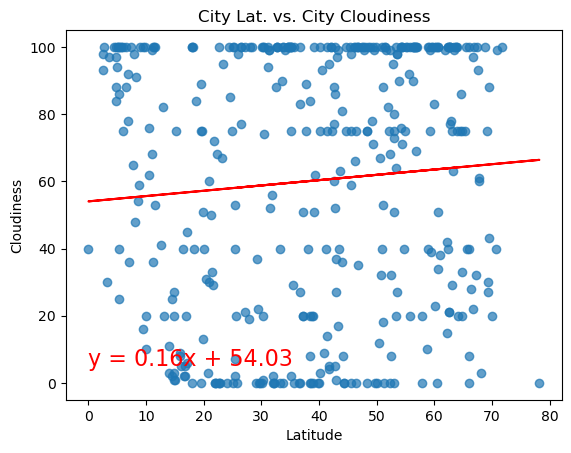

In [156]:
linRegPlot(north_hemi_df['Lat'], north_hemi_df['Cloudiness'])

Cloudiness vs. Latitude (South)

The r-value is: 0.2982772458261338


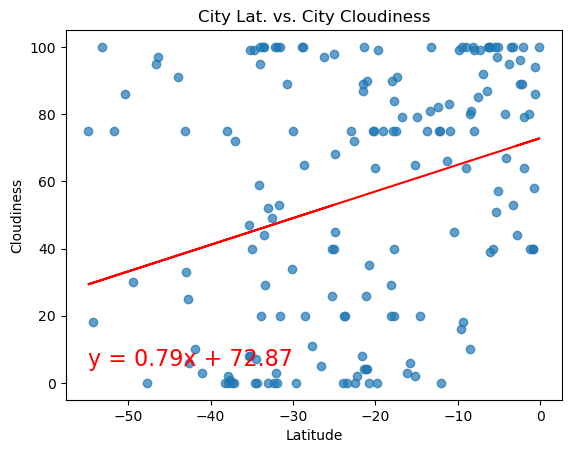

In [157]:
linRegPlot(south_hemi_df['Lat'], south_hemi_df['Cloudiness'])

**Description of relationship between Latitude and Cloudiness**
These linear regressions are modeling the relationship between the latitude of a city and the cloudiness of that city. Both hemispheres demonstrate positive correlations, though the strength of said correlation is dependent upon the hemisphere. According to the linear model, as latitude increases in the northern hemisphere, cloudiness increases slightly. In the northern hemisphere, latitude explains approximately 8% of the variance in cloudiness. In the southern hemisphere, as latitude increases, cloudiness increases. In the southern hemisphere, latitude explains about 29% of the variance in cloudiness. 

### Wind Speed vs. Latitude

Wind Speed vs. Latitude (North)

The r-value is: 0.05669119545228703


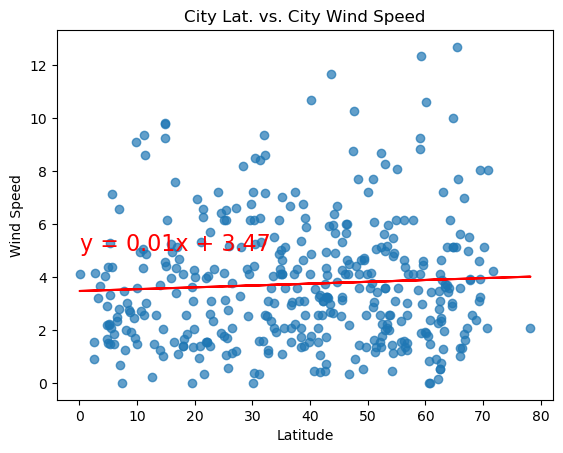

In [158]:
linRegPlot(north_hemi_df['Lat'], north_hemi_df['Wind Speed'])

Wind Speed vs. Latitude (South)

The r-value is: -0.25202457871951406


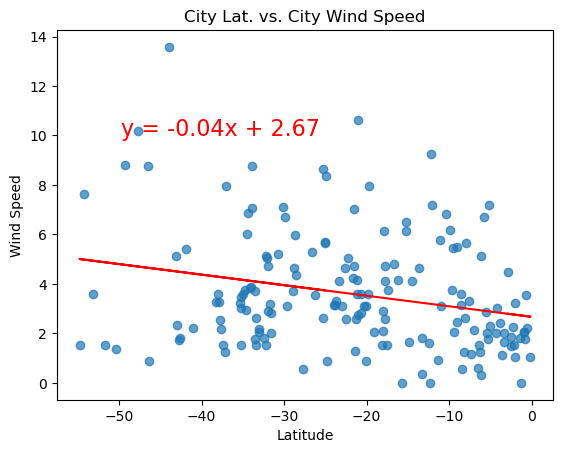

In [159]:
linRegPlot(south_hemi_df['Lat'], south_hemi_df['Wind Speed'])

**Description of relationship between Latitude and Wind Speed**
The two linear regressions above model the relationship between a city's latitude and wind speed. In the northern hemisphere, latitude is nominally, if at all, positivtely correlated with wind speed. In the north, latitude only explains 5% of the variance in wind speed. In the south, the relationship between wind speed and latitude is stronger and reversed in direction compared to the north. Latitude explains about 25% of the variance in wind speed in the southern hemisphere. 